In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader
import numpy as np
from torchvision.models import alexnet

## Visualize AlexNet

In [3]:
net = alexnet(pretrained=True)

In [5]:
from visualize_feature import InputMap
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [18]:
modules = [(, 0)]

In [19]:
im_map = InputMap(net, *modules[0], dataset='CIFAR')

In [20]:
img = im_map.get_input_map()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


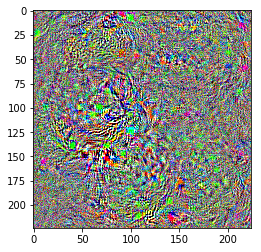

In [21]:
plt.imshow(img)

In [23]:
len(net.features)

13